In [7]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json

Populating the interactive namespace from numpy and matplotlib


In [10]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip" + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")
os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))

0

In [9]:
datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [11]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [8]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [22]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

### BY GENDER

In [12]:
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [13]:
##dropping some data I no longer need
df_dr = df.drop(df.columns[[0,3,4,5,6,7,8,9,10,11,12]], axis =1)
df_dr.head()

,starttime,stoptime,birth year,gender,ageM,ageF
0,1/1/2015 0:01,1/1/2015 0:24,1960.0,2,NaN,55.0
1,1/1/2015 0:02,1/1/2015 0:08,1963.0,1,52.0,NaN
2,1/1/2015 0:04,1/1/2015 0:10,1974.0,1,41.0,NaN
3,1/1/2015 0:04,1/1/2015 0:07,1969.0,1,46.0,NaN
4,1/1/2015 0:05,1/1/2015 0:21,1977.0,1,38.0,NaN


In [11]:
df_dr.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,birth year,gender,ageM,ageF
count,279924.000000,285552.000000,227764.000000,52093.000000
mean,1974.951419,1.162485,40.305272,38.951145
std,11.574637,0.419490,11.595240,11.405112
min,1899.000000,0.000000,16.000000,17.000000
25%,NaN,1.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN
max,1999.000000,2.000000,116.000000,89.000000


In [12]:
df_dr['ageM'].dropna(inplace= True)
df_dr['ageF'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio.
the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

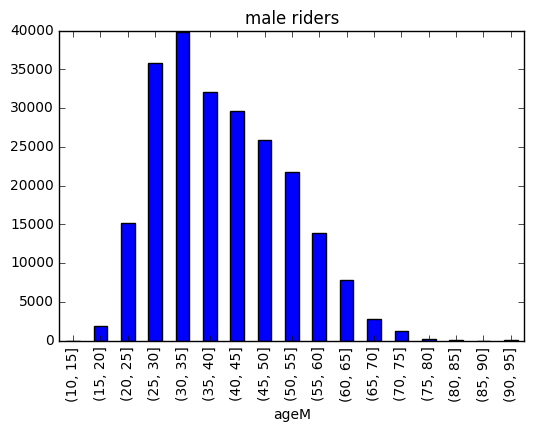

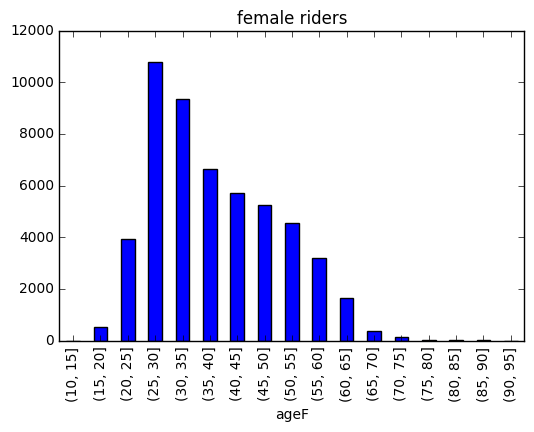

In [13]:
bins = np.arange(10, 99, 5)
axM = df_dr.ageM.groupby(pd.cut(df_dr.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df_dr.ageF.groupby(pd.cut(df_dr.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

#### Figure 1: histogrammed distribution of riders' ages by gender
this is how the cumulative distributions look like. Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]       0.000075
(90, 95]       0.000000


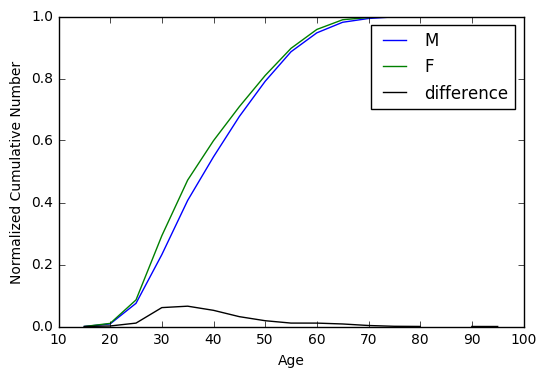

In [14]:
csM=df_dr.ageM.groupby(pd.cut(df_dr.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df_dr.ageF.groupby(pd.cut(df_dr.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

#### Figure 2: the cumulative distribution of CitiBike riders' ages by gender
They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated.
Notice that there may be NaN values you are gonna have to deal with! You can do that for example with a Boolean statementsuch as df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...   
### Lets run the scipy KS test

In [15]:
import scipy.stats

#### KS tests to compare 2 samples     
http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

In [16]:
ks = scipy.stats.ks_2samp(df_dr.ageM, df_dr.ageF)
print (ks)

Ks_2sampResult(statistic=0.09128675483027056, pvalue=1.1723000718567192e-307)


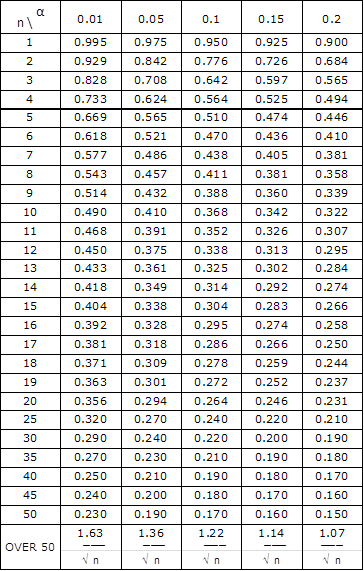

In [18]:
from IPython.display import Image
Image("http://i0.wp.com/www.real-statistics.com/wp-content/uploads/2012/12/image3737.png")

#### The KS statistic qualified distance between two distributions. In our case we can generate a Null Hypothesis.
#### Null Hypothesis:   
#### The male riders' age and female riders' age samples are drawn from a same continuous distribution.    

$ \alpha = 0.05 $   

$ D=1.1723000718567192e-307 $   

$ c(\alpha)\sqrt{(n_1+n_2)/n1*n2}  = 0.318/ \sqrt{(17+17)/(17*17)} =0.927 > D $   
#### The null hypothesis can't be rejeted, in 95% confidence level that the two samples are drawn from same continuous distribution.

### Now redo the test with a subsample of the data: take only 1 ride every of 200

In [45]:
df_dr.head()
df_dr.iloc[::200,:].head()
df2 = df_dr.iloc[::200,:]
df2.head()

,starttime,stoptime,birth year,gender,date,ageM,ageF
0,1/1/2015 0:01,1/1/2015 0:24,1960.0,2,2015-01-01 00:01:00,NaN,55.0
200,1/1/2015 1:36,1/1/2015 1:46,1965.0,1,2015-01-01 01:36:00,50.0,NaN
400,1/1/2015 2:52,1/1/2015 2:58,1989.0,1,2015-01-01 02:52:00,26.0,NaN
600,1/1/2015 7:02,1/1/2015 7:07,1957.0,1,2015-01-01 07:02:00,58.0,NaN
800,1/1/2015 9:41,1/1/2015 9:52,NaN,0,2015-01-01 09:41:00,NaN,NaN


In [56]:
df2['ageM'].dropna(inplace=True)
df2['ageF'].dropna(inplace=True)
df2['ageM'].head()

200     50.0
400     26.0
600     58.0
1000    31.0
1200    60.0
Name: ageM, dtype: float64

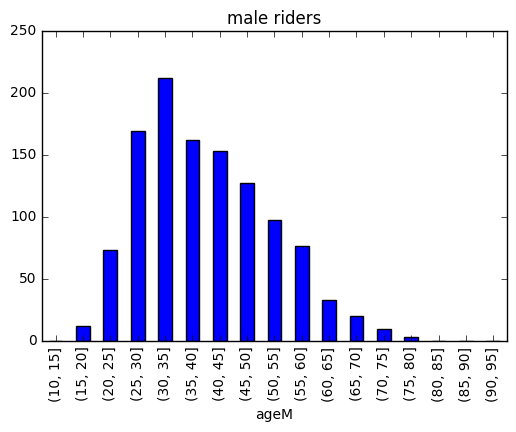

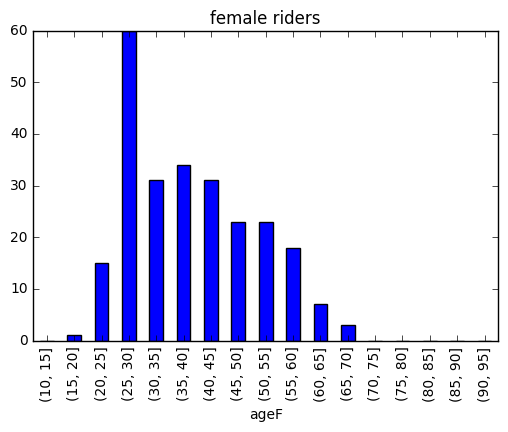

In [57]:
bins = np.arange(10, 99, 5)
axM = df2.ageM.groupby(pd.cut(df2.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df2.ageF.groupby(pd.cut(df2.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.006406
(20, 25]       0.009130
(25, 30]       0.087303
(30, 35]       0.028328
(35, 40]       0.025178
(40, 45]       0.017686
(45, 50]       0.000362
(50, 55]       0.009216
(55, 60]       0.016069
(60, 65]       0.015728
(65, 70]       0.010471
(70, 75]       0.002618
(75, 80]       0.000000
(80, 85]       0.000000
(85, 90]       0.000000
(90, 95]       0.000000


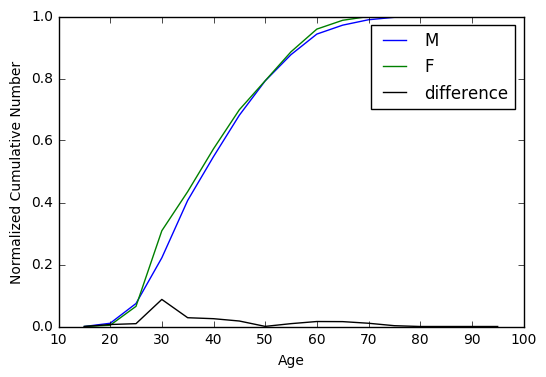

In [58]:

csM=df2.ageM.groupby(pd.cut(df2.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df2.ageF.groupby(pd.cut(df2.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt((csF / csF.max() - csM / csM.max())**2), 'k-',label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [60]:
ks = scipy.stats.ks_2samp(df2.ageM, df2.ageF)
print (ks)

Ks_2sampResult(statistic=0.10841998568198413, pvalue=0.015689150327056155)


#### The KS statistic qualified distance between two distributions. In our case we can generate a Null Hypothesis.
#### Null Hypothesis:   
#### The male riders' age and female riders' age samples are drawn from a same continuous distribution.    

$ \alpha = 0.05 $   

$ D=0.015689150327056155 $   

$ c(\alpha)\sqrt{(n_1+n_2)/n1*n2}  = 0.318/ \sqrt{(17+17)/(17*17)} =0.927 > D $   
#### The null hypothesis can't be rejeted, in 95% confidence level that the two samples are drawn from same continuous distribution.

### Pearson's test for correlation
notice that the Pearson's is a pairwise test: the samples need to be   
a. sorted and   
b. the same size!

In [16]:
bins = np.arange(10, 99, 5)
axM = df_dr.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero])
axF = df_dr.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero])
scipy.stats.pearsonr(axM, axF)

(array([ 0.97646797]), array([  2.10079881e-11]))

###    Null Hypothesis:
####  Distribution of male riders' age in the sample is consistent with female riders' age distribution.
#### The Pearson correlation is 0.9764, the null hypothesisi is true, we can say that the male riders' age and female riders' age has strong correlation.

### Spearman's test for correlation

In [17]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

scipy.stats.spearmanr(axM,axF,nan_policy='omit')

SpearmanrResult(correlation=0.98343558282208587, pvalue=1.5399565880544468e-12)

### Null hypothesis:   
#### The male riders's age has no correlation with the female riders' age.   
#### The p value is 1.53e-12 which is very samll, we can reject the null hypothesis. We conclude that there exists strong correlation between male riders's age and female riders' age.

### Extra credit

In [31]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ageM,ageF
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,NaN,55.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,52.0,NaN
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,41.0,NaN
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,46.0,NaN
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,38.0,NaN


In [32]:
df['starttime'].head()

0    1/1/2015 0:01
1    1/1/2015 0:02
2    1/1/2015 0:04
3    1/1/2015 0:04
4    1/1/2015 0:05
Name: starttime, dtype: object

In [46]:
df['starttime']  = pd.to_datetime(df['starttime'])
df['time'] = df['starttime'].apply( lambda x: x.time() )
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ageM,ageF,time
0,1346,2015-01-01 00:01:00,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,NaN,55.0,00:01:00
1,363,2015-01-01 00:02:00,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,52.0,NaN,00:02:00
2,346,2015-01-01 00:04:00,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,41.0,NaN,00:04:00
3,182,2015-01-01 00:04:00,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,46.0,NaN,00:04:00
4,969,2015-01-01 00:05:00,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,38.0,NaN,00:05:00


In [47]:
df['age']= 2015.0- df['birth year']

In [68]:
df['D/N']=df.time.apply(lambda x : 'D' if ((x > datetime.time(07,00,00)) & (x < datetime.time(19,00,00))) else 'N')
df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ageM,ageF,time,age,D/N
0,1346,2015-01-01 00:01:00,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,NaN,55.0,00:01:00,55.0,N
1,363,2015-01-01 00:02:00,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,52.0,NaN,00:02:00,52.0,N
2,346,2015-01-01 00:04:00,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,41.0,NaN,00:04:00,41.0,N
3,182,2015-01-01 00:04:00,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,46.0,NaN,00:04:00,46.0,N
4,969,2015-01-01 00:05:00,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,38.0,NaN,00:05:00,38.0,N
5,496,2015-01-01 00:07:00,1/1/2015 0:15,512,W 29 St & 9 Ave,40.750073,-73.998393,383,Greenwich Ave & Charles St,40.735238,-74.000271,20788,Subscriber,1969.0,2,NaN,46.0,00:07:00,46.0,N
6,152,2015-01-01 00:07:00,1/1/2015 0:09,498,Broadway & W 32 St,40.748549,-73.988084,474,5 Ave & E 29 St,40.745168,-73.986831,19006,Subscriber,1972.0,1,43.0,NaN,00:07:00,43.0,N
7,1183,2015-01-01 00:08:00,1/1/2015 0:28,405,Washington St & Gansevoort St,40.739323,-74.008119,174,E 25 St & 1 Ave,40.738177,-73.977387,17640,Subscriber,1985.0,2,NaN,30.0,00:08:00,30.0,N
8,846,2015-01-01 00:09:00,1/1/2015 0:23,450,W 49 St & 8 Ave,40.762272,-73.987882,488,W 39 St & 9 Ave,40.756458,-73.993722,15691,Subscriber,1991.0,1,24.0,NaN,00:09:00,24.0,N
9,576,2015-01-01 00:10:00,1/1/2015 0:20,160,E 37 St & Lexington Ave,40.748238,-73.978311,174,E 25 St & 1 Ave,40.738177,-73.977387,17837,Subscriber,1991.0,1,24.0,NaN,00:10:00,24.0,N


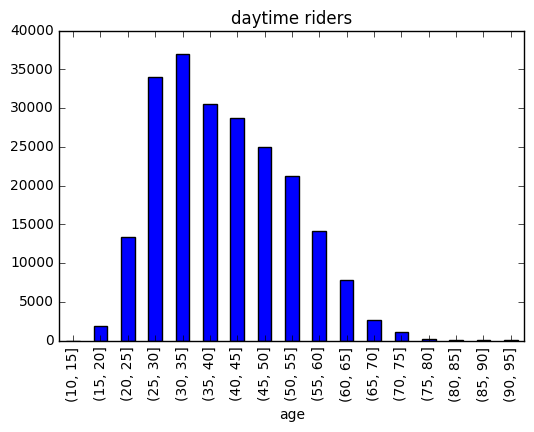

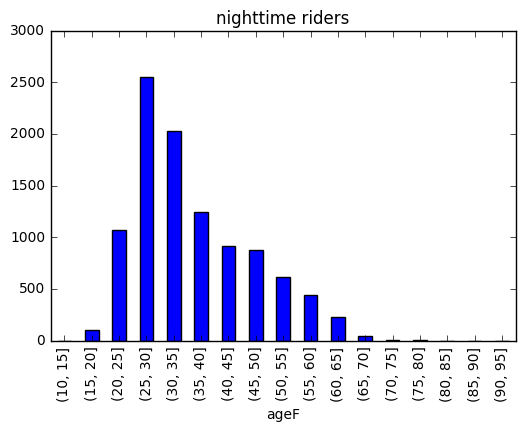

In [71]:
D=df[df['D/N'] == 'D']
N=df[df['D/N'] == 'N']
bins = np.arange(10, 99, 5)
axD = D.age.groupby(pd.cut(D.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("daytime riders")
axN = N.ageF.groupby(pd.cut(N.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("nighttime riders")

In [72]:
bins = np.arange(10, 99, 5)
axD = D.age.groupby(pd.cut(D.age, bins)).agg([count_nonzero])
axN = N.ageF.groupby(pd.cut(N.ageF, bins)).agg([count_nonzero])
scipy.stats.pearsonr(axD, axN)

(array([ 0.90804566]), array([  4.72571018e-07]))

#### The Pearson correlation is 0.9080, the null hypothesisi is true, we can say that the male riders' age and female riders' age has strong correlation.